In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df=pd.read_csv("Wine.csv")
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
print(df.columns)

Index(['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')


In [11]:
X = df.drop(columns=['Class']) 
y = df['Class']  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
pca_df['Class'] = y 

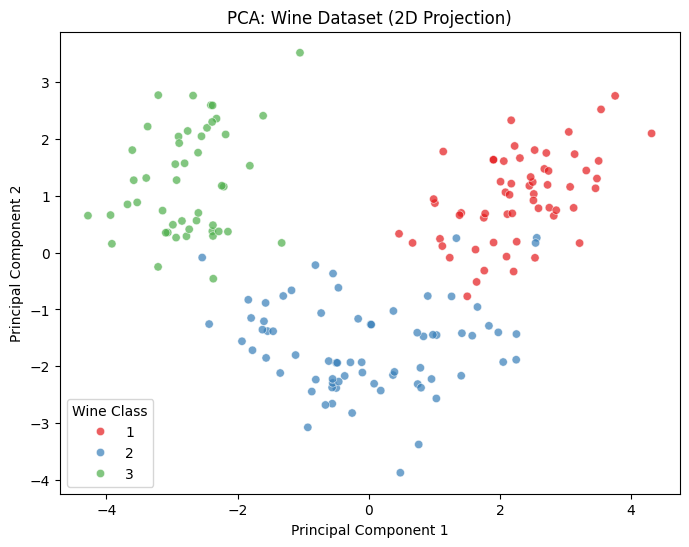

In [13]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_df['PCA1'], y=pca_df['PCA2'], hue=pca_df['Class'], palette="Set1", alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA: Wine Dataset (2D Projection)")
plt.legend(title="Wine Class")
plt.show()

In [15]:
explained_variance = pca.explained_variance_ratio_
total_variance = np.sum(explained_variance)
print(f" Explained Variance by PCA1 & PCA2: {explained_variance}")
print(f"Total Variance Retained: {total_variance:.4f}")


 Explained Variance by PCA1 & PCA2: [0.36198848 0.1920749 ]
Total Variance Retained: 0.5541
